# Preprocessing Data for SciKit-Learn
Student: Tim Lynch<br>
Professor: Charles Pak<br>

For this week we are to gather mushroom data from the Agaricus Lepiota Data available from UCI. We should include a few columns that we think would be useful in our future predictions.

In [89]:
#Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

#MatPlotLib 
%matplotlib inline

#Reading in Full Data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',header=None)

#Testing the Data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [90]:
#Only the data we want
partial_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',header=None,usecols = [0,3,5])

column_data = ['Dangerous','Cap-Color','Odor']
partial_data.columns = column_data
partial_data.head()

,Dangerous,Cap-Color,Odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n


In [91]:
partial_data.dtypes

Dangerous    object
Cap-Color    object
Odor         object
dtype: object

__For Processing in SciKitLearn we know we need our data to be numeric. First we need to convert the values into strings, but strings that can later be turned into integers__

In [92]:
partial_data['Dangerous'] = partial_data['Dangerous'].replace(to_replace = {'e':'0','p':'1'})
partial_data['Cap-Color'] = partial_data['Cap-Color'].replace(to_replace = {'n':'0','b':'1','c':'2','g':'3','r':'4',
                                                                            'p':'5','u':'6','e':'7', 'w':'8','y':'9'})
partial_data['Odor'] = partial_data['Odor'].replace(to_replace = {'a':'0', 'l':'1','c':'2','y':'3','f':'4','m':'5',
                                                                  'n':'6','p':'7','s':'8'})

In [93]:
partial_data.head()

,Dangerous,Cap-Color,Odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6


__Converting columns from string to integers for use in scikitlearn__


In [94]:
partial_data['Dangerous'] = partial_data['Dangerous'].astype(int)
partial_data['Cap-Color'] = partial_data['Cap-Color'].astype(int)
partial_data['Odor'] = partial_data['Odor'].astype(int)

In [95]:
partial_data.dtypes

Dangerous    int64
Cap-Color    int64
Odor         int64
dtype: object

__Next we want to perform some data exploratory analysis__

The assignment actually called for a scatterplot regression. However, that doesn't really fit our purposes (atleast not yet). A better indicator to just see if our columns are useful is to group the data and plot it into a bar chart. There are better ways to see if the data we are including is useful but that will come later for Project 4.  

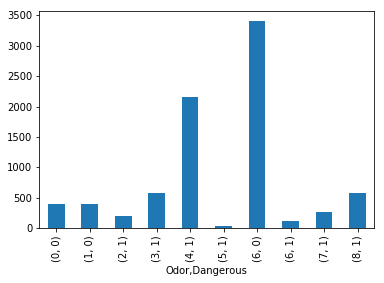

In [96]:
grouped_data = partial_data.groupby(['Odor','Dangerous']).size().plot(kind = 'bar')

As we can see above the most likely dangerous mushrooms will have a smell of 'foul' or the number 4. Interestingly enough according to the data, most of the mushrooms have 'none or 6' as 'odor' and actually aren't poisonous. I believe that odor is still a good candidate, but for different reasons. 

Forensic Files (TV show on Netflix) would have me believe that the 'odor' of Almond would be suspicious and probably dangerous since it is most commonly associated with Cyanide. However, according to the data we have above in the bar chart there are no poisonous mushrooms that have just an odor of almond.

However, if we check the data from the agaricus-lepiota.names we see that if we were to rule out Almond, combined with Anise, or None, we would actually end up missing close to 120 poisonous mushrooms (deadly). I wouldn't want to be the person to test this 

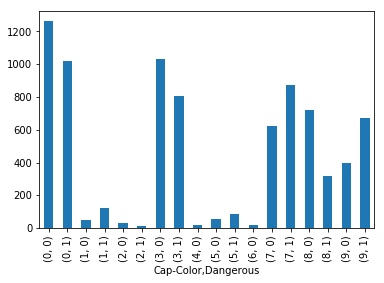

In [97]:
grouped_data2 = partial_data.groupby(['Cap-Color', 'Dangerous']).size().plot(kind = 'bar')

Cap color is less of an indicator as it looks like it falls into a lot more middle area's than the previous example of odor. That is good though because we can see which cap-color is most likely to be deadly.  